In [93]:
import os
import pandas as pd
import matplotlib
data = []
data.append(pd.read_csv('data2009-08-09-2010-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2010-08-09-2011-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2011-08-09-2012-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2012-08-09-2013-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2013-08-09-2014-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2014-08-09-2015-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2015-08-09-2016-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2016-08-09-2017-08-09', sep='\t', index_col=['CIK', 'Date Filed']))
data.append(pd.read_csv('data2017-08-09-2018-08-09', sep='\t', index_col=['CIK', 'Date Filed']))

data = pd.concat(data)

In [94]:
data.sort_index()

Unnamed: 0  \
CIK     Date Filed               
1961    20130214          4688   
2381    20110228          3162   
2473    20101021          6419   
2809    20091207          5832   
        20101207          5364   
        20110318          2665   
        20120319          3654   
        20130221          4494   
4187    20130409          3302   
        20150107          6584   
        20150814         10724   
        20160406          3803   
        20160627          1308   
        20180410          3859   
6732    20150114          6333   
        20150114          6334   
        20150114          6335   
7951    20100610          1423   
        20110224          3266   
8328    20091124          6097   
        20141106          8378   
        20170905         10599   
8504    20110119          4154   
12239   20121116          6866   
        20130701          1158   
        20131112          5480   
13055   20090922          7659   
        20100409          2981   
15615   20091118          6259   
15847   20100902          7596   
...                        ...   
1749213 20180808            49   
1749230 20180807            96   
1749272 20180806           157   
1749274 20180807           116   
1749278 20180806           168   
1749285 20180809             1   
1749325 20180807           124   
1749337 20180808            84   
1749347 20180807            94   
1749365 20180809            29   
1749379 20180807           103   
1749395 20180807            92   
1749423 20180809            35   
1749427 20180807           134   
1749469 20180807           100   
1749470 20180807            89   
1749503 20180809            22   
1749527 20180808            68   
1749528 20180809            38   
1749537 20180808            73   
1749555 20180808            44   
1749557 20180809            18   
1749599 20180808            50   
1749708 20180809            14   
1749736 20180809            20   
1749765 20180809            32   
1749799 20180809            36   
1749802 20180809            31   
1749826 20180809            12   
1749839 20180809             6   

                                       Clarification of Sales Amounts  \
CIK     Date Filed                                                      
1961    20130214                                                  NaN   
2381    20110228                                                  NaN   
2473    20101021                                                  NaN   
2809    20091207    The $32,205,600 amount represents the aggregat...   
        20101207    The $32,205,600 amount represents the aggregat...   
        20110318    The $32,205,600 amount represents the aggregat...   
        20120319    The $32,205,600 amount represents the aggregat...   
        20130221    The $32,205,600 amount represents the aggregat...   
4187    20130409    Details of the Offering may be found in the Is...   
        20150107                                                  NaN   
        20150814    The Issuer issued 50,670 shares of its common ...   
        20160406    The Total Offering Amount is based on the 32,0...   
        20160627    The Total Offering Amount is based on the 90,0...   
        20180410    Offering amount based on 58,646 shares of comm...   
6732    20150114                                                  NaN   
        20150114                                                  NaN   
        20150114                                                  NaN   
7951    20100610    Based upon the total number of shares of commo...   
        20110224                                                  NaN   
8328    20091124                                                  NaN   
        20141106                                                  NaN   
        20170905                                                  NaN   
8504    20110119                   Proceeds used for working capital.   
12239   20121116                                    

In [95]:
comp = data.groupby('CIK').first()
locdata = comp.groupby('JurisdictionOfInc').count().iloc[:,0:1]

In [96]:
dum = locdata.copy()
s = dum.iloc[:,0].sum()
drop = []
other = 0
for n, item in enumerate(dum.iloc[:,0]):
    if item/s < 0.02:
        other += item
        drop.append(n)
dum.drop(dum.index[drop], inplace=True)
dum.rename( columns={'Unnamed: 0':'num'}, inplace=True )
d = {'Others':other}
newrow = pd.DataFrame({'num':other}, index=['Other'])
dum = pd.concat([dum, newrow])


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "upper". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


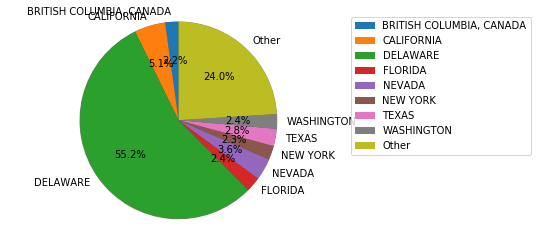

In [97]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dum.index.tolist()
sizes = dum.iloc[:,0].tolist()
# explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(pie[0], labels, loc="upper", bbox_to_anchor = (1,1))
plt.show()

In [107]:
data.keys()

Index(['Unnamed: 0', 'Clarification of Sales Amounts', 'Company',
       'Date of First Sale', 'Duration of Offering More than One Year',
       'Entity Type', 'File Name', 'Form Type', 'Has Non-Accredited Investors',
       'Industry Group', 'Is Amendment', 'Issuer Size', 'JurisdictionOfInc',
       'Min Investment Accepted', 'Sales Compensation List', 'Since',
       'Total Amount Sold', 'Total Number of Inversters Already Invested',
       'Total Offering Amount', 'Total Remaining',
       'Types of Securities Offered', 'relatedPersons'],
      dtype='object')

In [277]:
time_amount_data = data[data['Form Type'] == 'D'].iloc[:,[15,18, 16]]
time_amount_data = time_amount_data[time_amount_data['Since'] != 'Over 5 years']
time_amount_data = time_amount_data[time_amount_data['Total Offering Amount'] != 'Indefinite']
newdf = pd.DataFrame(time_amount_data.index.get_level_values('Date Filed')).iloc[:,0].apply(lambda x: int(str(x)[0:4]))
time_amount_data['Year Filed'] = newdf.values
time_amount_data['Since'] = pd.to_numeric(time_amount_data['Since'])
newdf = time_amount_data['Year Filed'].sub(time_amount_data['Since'])
time_amount_data['Year Old when Filed'] = pd.to_numeric(newdf)
time_amount_data['Total Offering Amount'] = pd.to_numeric(time_amount_data['Total Offering Amount'], None)
time_amount_data = time_amount_data[time_amount_data['Total Offering Amount'] > 0]
newdf = time_amount_data['Total Amount Sold'].divide(time_amount_data['Total Offering Amount'])
time_amount_data['Ratio of Sold'] = pd.to_numeric(newdf)



In [270]:
newdf = pd.DataFrame(time_amount_data.index.get_level_values('Date Filed')).iloc[:,0].apply(lambda x: int(str(x)[0:4]))
newdf.values


array([2010, 2010, 2010, ..., 2017, 2017, 2017])

In [278]:
time_amount_data

Since  Total Offering Amount  Total Amount Sold  \
CIK     Date Filed                                                    
1498456 20100809     2010                 550000             550000   
1459000 20100809     2007               10049759           10049759   
1431277 20100809     2006                1000000             617303   
1390831 20100809     2006                5880849            5880849   
        20100809     2006                1318667            1318667   
        20100809     2006                   5491               5491   
1498505 20100809     2010                2155089            2155089   
1470067 20100809     2006                4000000            4000000   
1498375 20100809     2005                2200000            2110000   
1498539 20100809     2009                 450000             450000   
1496918 20100809     2009                2000000            2000000   
1498432 20100809     2010                5520964            5502964   
1421739 20100809     2007                5000000            4600000   
1498169 20100809     2010                 200000             120000   
1450573 20100809     2008                1000000              50000   
1491029 20100809     2010                  43800              43800   
1480766 20100809     2009                 200002             200002   
1496983 20100809     2010                 750000             250000   
1498437 20100806     2008                2000000             952098   
1498424 20100806     2007                8000000            8000000   
1497426 20100806     2010              305079948          305079948   
1497984 20100806     2010                  50000              50000   
1443292 20100806     2007                 296500             296500   
1494413 20100806     2009                 110000             110000   
1498181 20100806     2005                1580000            1580000   
1497926 20100806     2010                3500000            2800000   
1498277 20100806     2010               30000000                  0   
1474432 20100806     2009               20000016           18400004   
1470901 20100806     2008                4875231            4875231   
1498334 20100806     2010                 255000                  0   
...                   ...                    ...                ...   
1683027 20170811     2015                5500001            4461901   
1700214 20170811     2016                 294997             294997   
1714497 20170811     2016                 500000              16000   
1714533 20170811     2016                 500000             300000   
1714404 20170811     2017                2367426            2367426   
1635077 20170811     2015                2999999            1499999   
1640146 20170811     2014                 750000             750000   
1714532 20170811     2013                2750001            2750001   
1714045 20170811     2015                 983000             983000   
1714326 20170811     2016                 120000             120000   
1688062 20170811     2016                1500000             150030   
1674401 20170811     2015                2000000            1122544   
1714022 20170811     2017               22244381           21744381   
1704244 20170810     2017               14600000           14600000   
1679856 20170810     2015                 450000             108000   
1701549 20170810     2016                  44800              25600   
1714355 20170810     2015                 250000             250000   
1709963 20170810     2015                  75000              75000   
1714014 20170810     2016                9370000            5499997   
1660415 20170810     2015                1000000             558282   
1711729 20170810     2016                1000000            1000000   
1714459 20170810     2013                  25000                  0   
1714414 20170810     2013                 500000              50000   
1615055 20170810     2014                640

Text(0.5,1,'Total Offered Amount vs Age of Company')

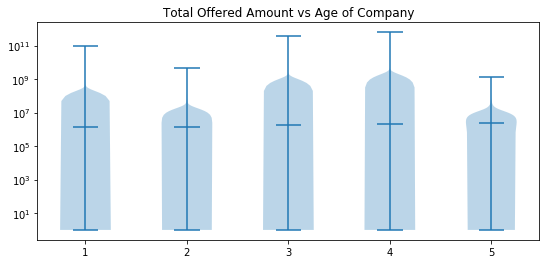

In [275]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
alldata = []
for x in range(0,5):
    alldata.append(time_amount_data[time_amount_data['Year Old when Filed'] == x].loc[:,'Total Offering Amount'].values)
axes.violinplot(alldata, [1,2,3,4,5], points=2000, widths=0.5, showmeans=False,
                showextrema=True, showmedians=True)
axes.set_yscale('log')
axes.set_title('Total Offered Amount vs Age of Company')

Text(0.5,1,'Ratio of Sold Offering vs Age of Company')

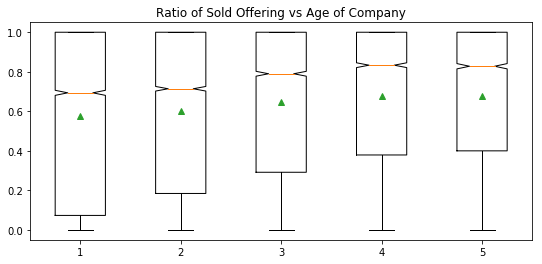

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
alldata = []
for x in range(0,5):
    alldata.append(time_amount_data[time_amount_data['Year Old when Filed'] == x].loc[:,'Ratio of Sold'].values)
axes.boxplot(alldata, [1,2,3,4,5], widths=0.5, showmeans=True,
                )
axes.set_title('Ratio of Sold Offering vs Age of Company')